In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,0.0,33.6,0.627,50.0
1,1,85,66,29,0.0,26.6,0.351,31.0
2,8,183,64,0,0.0,23.3,0.672,32.0
3,1,89,66,23,94.0,28.1,0.167,21.0
4,0,137,40,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63.0
764,2,122,70,27,0.0,36.8,0.340,27.0
765,5,121,72,23,112.0,26.2,0.245,30.0
766,1,126,60,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
float64		column 5	114
float64		column 6	38
float64		column 7	19
float64		column 8	133


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,768.000000,768.000000,768.000000,654.000000,730.000000,749.000000,635.000000
mean,3.845052,120.894531,69.105469,20.536458,80.729358,32.208082,0.469996,33.311811
std,3.369578,31.972618,19.355807,15.952218,115.579564,7.763704,0.325450,11.768687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.243000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.350000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.600000,0.626000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

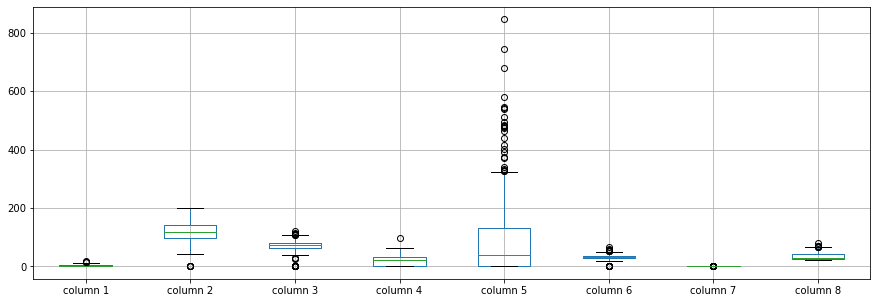

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.894531
column 3     69.105469
column 4     20.536458
column 5     80.729358
column 6     32.208082
column 7      0.469996
column 8     33.311811
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.129459,0.141282,-0.081672,-0.133097,0.006719,-0.042234,0.538298
column 2,0.129459,1.000000,0.152590,0.057328,0.312242,0.221810,0.124714,0.255373
column 3,0.141282,0.152590,1.000000,0.207371,0.068138,0.252242,0.038366,0.248163
column 4,-0.081672,0.057328,0.207371,1.000000,0.437669,0.385076,0.181387,-0.154958
column 5,-0.133097,0.312242,0.068138,0.437669,1.000000,0.183177,0.146876,-0.100125
column 6,0.006719,0.221810,0.252242,0.385076,0.183177,1.000000,0.129570,-0.011979
column 7,-0.042234,0.124714,0.038366,0.181387,0.146876,0.129570,1.000000,0.007666
column 8,0.538298,0.255373,0.248163,-0.154958,-0.100125,-0.011979,0.007666,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+77,8+77+77,8+77+77+77,8+77+77+77+77,8+77+77+77+77+77,8+77+77+77+77,8+77+77+77,8+77+77,8+77,8], vae_layer = False, seed = 77)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 400.0686403910319
Epoch: 1 , loss: 399.16107177734375
Epoch: 2 , loss: 399.2167790730794
Epoch: 3 , loss: 385.86120859781903
Epoch: 4 , loss: 368.52251688639325
Epoch: 5 , loss: 359.367244720459
Epoch: 6 , loss: 350.98497581481934
Epoch: 7 , loss: 349.98415501912433
Epoch: 8 , loss: 342.96109708150226
Epoch: 9 , loss: 336.957480430603
Epoch: 10 , loss: 328.6185579299927
Epoch: 11 , loss: 328.905831972758
Epoch: 12 , loss: 317.00602467854816
Epoch: 13 , loss: 308.2995189030965
Epoch: 14 , loss: 300.45759296417236
Epoch: 15 , loss: 295.3079735438029
Epoch: 16 , loss: 287.3970826466878
Epoch: 17 , loss: 288.00538698832196
Epoch: 18 , loss: 273.792875289917
Epoch: 19 , loss: 276.1507962544759
Epoch: 20 , loss: 276.50710010528564
Epoch: 21 , loss: 269.85128053029376
Epoch: 22 , loss: 270.55263646443683
Epoch: 23 , loss: 265.1580801010132
Epoch: 24 , loss: 264.1531791687012
Epoch: 25 , loss: 268.6920398076375

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,0,0,0.0,0.0,0.0,0.0
2,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0,0,0,0,0.0,0.0,0.0,0.0
764,0,0,0,0,0.0,0.0,0.0,0.0
765,0,0,0,0,0.0,0.0,0.0,0.0
766,0,0,0,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1284.72582061853, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.22240264220117975

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,0.0,33.6,0.627,50.0
1,1,85,66,29,0.0,26.6,0.351,31.0
2,8,183,64,0,0.0,23.3,0.672,32.0
3,1,89,66,23,94.0,28.1,0.167,21.0
4,0,137,40,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63.0
764,2,122,70,27,0.0,36.8,0.340,27.0
765,5,121,72,23,112.0,26.2,0.245,30.0
766,1,126,60,0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AE_5.xlsx", index=False, header=False)